<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/baitap_chiTay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
folder = '/content/drive/MyDrive/FILE_ANH_AI/ChiTay/'

photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('leftRich'):
    output= 1.0
  if file.startswith('rightPoor'):
    output= 2.0
  photo = load_img(folder + file, target_size= (32,32))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [82]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/npy_Data/leftRich.npy', photos)
save('/content/drive/MyDrive/npy_Data/rightPoor.npy', labels)

(2600, 32, 32, 3) (2600,)


In [83]:
# Split data into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2, random_state=42)

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2080, 32, 32, 3)
(2080,)
(520, 32, 32, 3)
(520,)


In [85]:
x_train = x_train.reshape((2080, 32, 32, 3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((520, 32, 32, 3))
x_test = x_test.astype('float32')/255

In [86]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [87]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses

loss = losses
batch_size = 64
epochs = 40
classes = 3

In [88]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (32, 32, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [89]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))#lớp ẩn có 1024 lớp

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                      

In [90]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
33/33 [==============================] - 4s 16ms/step - loss: 0.8255 - accuracy: 0.5010
Epoch 2/40
33/33 [==============================] - 1s 23ms/step - loss: 0.7065 - accuracy: 0.5029
Epoch 3/40
33/33 [==============================] - 1s 22ms/step - loss: 0.6989 - accuracy: 0.5111
Epoch 4/40
33/33 [==============================] - 1s 21ms/step - loss: 0.6975 - accuracy: 0.4971
Epoch 5/40
33/33 [==============================] - 1s 20ms/step - loss: 0.6982 - accuracy: 0.4952
Epoch 6/40
33/33 [==============================] - 1s 18ms/step - loss: 0.6962 - accuracy: 0.4827
Epoch 7/40
33/33 [==============================] - 1s 19ms/step - loss: 0.6978 - accuracy: 0.5048
Epoch 8/40
33/33 [==============================] - 0s 13ms/step - loss: 0.7012 - accuracy: 0.5058
Epoch 9/40
33/33 [==============================] - 0s 13ms/step - loss: 0.6941 - accuracy: 0.5135
Epoch 10/40
33/33 [==============================] - 0s 13ms/step - loss: 0.6952 - accuracy: 0.4861
Epoch 11/

In [91]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

17/17 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5269
Test accuracy: 0.5269230604171753


In [93]:
#lưu data
model.save('/content/drive/MyDrive/Colab Notebooks/BAITAP/chiTayModel.h5')

1/1 [==============================] - 0s 19ms/step
leftRich


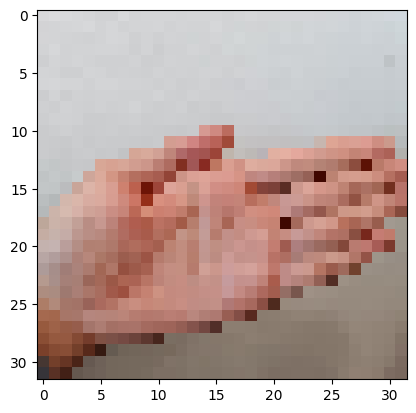

In [95]:
#thu nghiem
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img = load_img('/content/drive/MyDrive/npy_Data/Chitay_TUNG/leftRich.jpg', target_size=(32, 32, 3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img/255
photo=np.expand_dims(img,axis=0)
predicted_label = (model.predict(img).argmax())

class_name=['','leftRich', 'rightPoor']
print(class_name[predicted_label])
plt.show()
